In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-health-and-development-2012-2021/global_health.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/kaggle/input/global-health-and-development-2012-2021/global_health.csv')
#print(df.head(20))
print(df.info())
print(df.describe())
print(df.isna().sum())
# normaly should handling missing data before correlation test, however the pearson pairwise deletion
#here have the same result as if imputation mean/median method first(have tested it).
# correlation map
corr_matrix = df.drop(['Country','Country_Code'], axis=1).corr(method='pearson', min_periods=1)
"""
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, 
            annot=True,     
            cmap='coolwarm',
            center=0,       
            vmin=-1, 
            vmax=1,
            square=True)    
plt.title('Pearson Correlation Heatmap')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880 entries, 0 to 1879
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country                         1880 non-null   object 
 1   Country_Code                    1880 non-null   object 
 2   Year                            1880 non-null   int64  
 3   Fertility_Rate                  1844 non-null   float64
 4   Urban_Population_Percent        1880 non-null   float64
 5   Total_Population                1880 non-null   float64
 6   Water_Access_Percent            1225 non-null   float64
 7   Unemployment_Rate               1740 non-null   float64
 8   Sanitary_Expense_Per_GDP        1834 non-null   float64
 9   Life_Expectancy                 1840 non-null   float64
 10  Life_Expectancy_Female          1840 non-null   float64
 11  Life_Expectancy_Male            1840 non-null   float64
 12  Infant_Deaths                   18

"\nplt.figure(figsize=(20, 16))\nsns.heatmap(corr_matrix, \n            annot=True,     \n            cmap='coolwarm',\n            center=0,       \n            vmin=-1, \n            vmax=1,\n            square=True)    \nplt.title('Pearson Correlation Heatmap')\nplt.xticks(rotation=45, ha='right')\nplt.tight_layout()\nplt.show()\n"

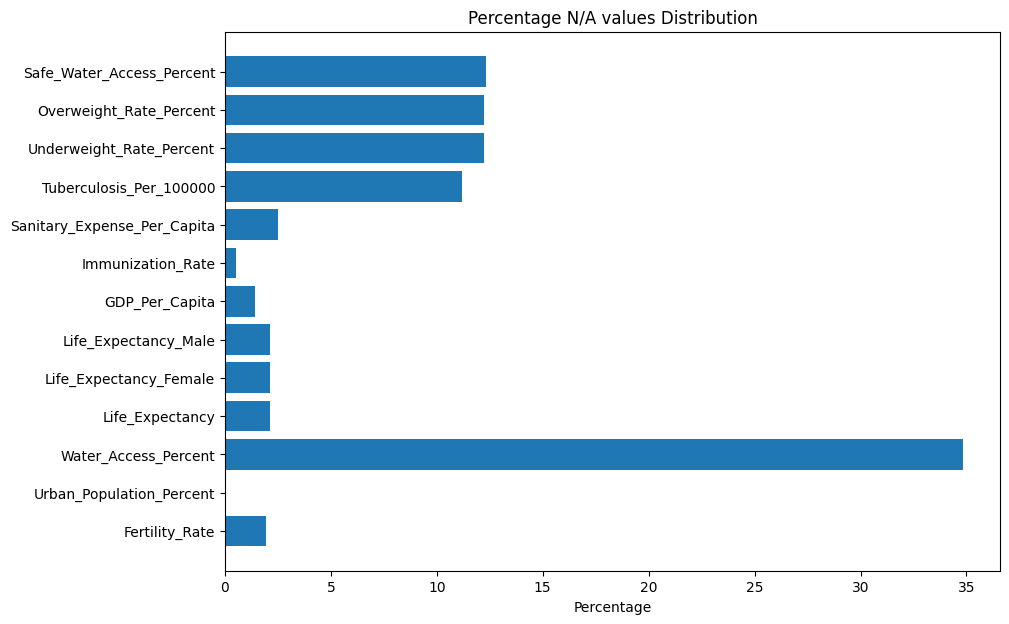

In [3]:
threshold = 0.5
significant_corr = (corr_matrix["Life_Expectancy"].abs() > threshold)
filtered_columns = corr_matrix.columns[significant_corr]

filtered_df = df[filtered_columns]

plt.figure(figsize=(10, 7))
plt.barh(filtered_df.columns, filtered_df.isna().mean()*100)
plt.title('Percentage N/A values Distribution')
plt.xlabel('Percentage')
plt.show()


In [4]:
# For missing data < 15% we use the Simple mean/median imputation.
# For missing data > 30% we remove the affected columns.
choosed_columns = ["Life_Expectancy",
                   "Fertility_Rate",
                   "Urban_Population_Percent", 
                   "Safe_Water_Access_Percent", 
                   "GDP_Per_Capita", 
                   "Immunization_Rate", 
                   "Sanitary_Expense_Per_Capita",
                   "Tuberculosis_Per_100000", 
                   "Underweight_Rate_Percent", 
                   "Overweight_Rate_Percent"]
print(filtered_df[choosed_columns].describe())
clean_df = filtered_df[choosed_columns].fillna(filtered_df.median())
"""
fig, axes = plt.subplots(5, 2, figsize=(15, 10))
axes = axes.ravel()
for i, col in enumerate(choosed_columns):
    sns.histplot(clean_df[col], kde=True, ax=axes[i], label=col)
plt.tight_layout()
plt.show()
"""


       Life_Expectancy  Fertility_Rate  Urban_Population_Percent  \
count      1840.000000     1844.000000               1880.000000   
mean         71.435155        2.762999                 58.616514   
std           7.836184        1.345580                 23.170964   
min          47.835000        0.808000                 11.194000   
25%          65.367000        1.670000                 40.069000   
50%          72.554000        2.311000                 58.884000   
75%          77.422750        3.645500                 77.633750   
max          84.560000        7.400000                100.000000   

       Safe_Water_Access_Percent  GDP_Per_Capita  Immunization_Rate  \
count                1648.000000     1853.000000        1870.000000   
mean                   81.960376    15919.388028          87.935294   
std                    21.324338    26070.779260          13.140008   
min                    25.610000      216.827417          19.000000   
25%                    65.555000

'\nfig, axes = plt.subplots(5, 2, figsize=(15, 10))\naxes = axes.ravel()\nfor i, col in enumerate(choosed_columns):\n    sns.histplot(clean_df[col], kde=True, ax=axes[i], label=col)\nplt.tight_layout()\nplt.show()\n'

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

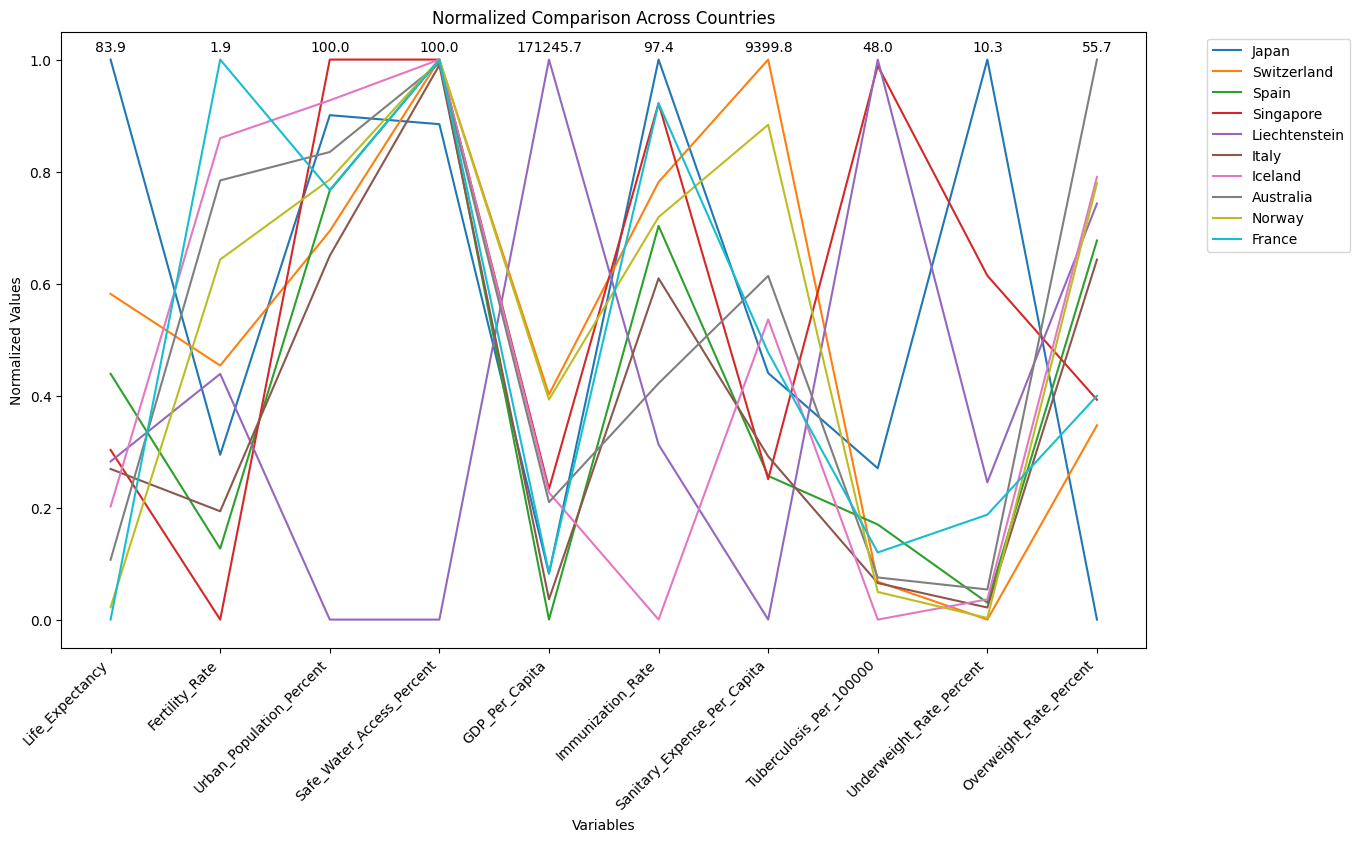

               Life_Expectancy  Fertility_Rate  Urban_Population_Percent  \
Country                                                                    
Japan                83.946732          1.3990                   91.5014   
Switzerland          83.315366          1.5160                   73.7798   
Spain                83.100244          1.2760                   79.9675   
Singapore            82.895122          1.1830                  100.0000   
Liechtenstein        82.864146          1.5050                   14.3531   
Italy                82.843902          1.3250                   70.0058   
Iceland              82.742683          1.8140                   93.7618   
Australia            82.599268          1.7586                   85.8650   
Norway               82.471463          1.6550                   81.6460   
France               82.438049          1.9170                   80.0529   

               Safe_Water_Access_Percent  GDP_Per_Capita  Immunization_Rate  \
Country 

In [5]:
from sklearn.preprocessing import MinMaxScaler
combined_df = clean_df.assign(Country=df['Country'])
result = combined_df.groupby('Country')[choosed_columns].mean()
top10_df = result.sort_values(by="Life_Expectancy", ascending=False).head(10)

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(top10_df)
normalized_df = pd.DataFrame(normalized_data, columns=top10_df.columns, index=top10_df.index)



# Melt the DataFrame
melted_df = normalized_df.reset_index().melt(
    id_vars='Country', 
    var_name='Variables', 
    value_name='Normalized Values'
)

plt.figure(figsize=(14, 8), dpi=100)
sns.lineplot(data=melted_df, x='Variables', y='Normalized Values', hue='Country')
plt.title("Normalized Comparison Across Countries")
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

for i, var in enumerate(top10_df.columns):
    max_val = top10_df[var].max()
    plt.text(
        i, 1.01,  # x: index of variable, y: slightly above normalized range
        f'{max_val:.1f}',  # Format the real value
        ha='center', va='bottom', fontsize=10, color='black'
    )

 

plt.show()

print(top10_df)

In [6]:
"""
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
y = pd.DataFrame(df["Life_Expectancy"].fillna(df["Life_Expectancy"].median()))
y = y.values.ravel()
X =  clean_df.drop(["Life_Expectancy"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y)
tpot = TPOTRegressor(
    generations=5,       # Number of iterations 
    population_size=50,  # Number of models in each generation
    cv=5,                # Cross-validation folds
    random_state=42      # Reproducibility
)

tpot.fit(X_train, y_train)
predictions_noscale = tpot.predict(X_test)
R2_score_W = r2_score(y_test, predictions_noscale)
RMSE_W = np.sqrt(mean_squared_error(y_test, predictions_noscale))
print("R2_score_Without_scaled: ", R2_score_W,
      "RMSE_Without_scaled:", RMSE_W)



pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('tpot', tpot)
])
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
R2_score = r2_score(y_test, predictions)
RMSE = np.sqrt(mean_squared_error(y_test, predictions))
print("R2_score: ", R2_score,
      "RMSE:", RMSE)
"""

'\nfrom tpot import TPOTRegressor\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.metrics import mean_squared_error, r2_score\nfrom sklearn.pipeline import Pipeline\nfrom sklearn.preprocessing import StandardScaler, MinMaxScaler\ny = pd.DataFrame(df["Life_Expectancy"].fillna(df["Life_Expectancy"].median()))\ny = y.values.ravel()\nX =  clean_df.drop(["Life_Expectancy"], axis=1)\nX_train, X_test, y_train, y_test = train_test_split(X, y)\ntpot = TPOTRegressor(\n    generations=5,       # Number of iterations \n    population_size=50,  # Number of models in each generation\n    cv=5,                # Cross-validation folds\n    random_state=42      # Reproducibility\n)\n\ntpot.fit(X_train, y_train)\npredictions_noscale = tpot.predict(X_test)\nR2_score_W = r2_score(y_test, predictions_noscale)\nRMSE_W = np.sqrt(mean_squared_error(y_test, predictions_noscale))\nprint("R2_score_Without_scaled: ", R2_score_W,\n      "RMSE_Without_scaled:", RMSE_W)\n\n\n\npipeline = Pipeline